<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#polynomial-Regression" data-toc-modified-id="polynomial-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>polynomial Regression</a></span></li></ul></div>

In [59]:
import pandas as pd

wine_df = pd.read_csv("WineQT.csv")

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [61]:
# styles for seaborn and matplotlib 
plt.style.use("ggplot")
sns.set_palette("viridis")

In [62]:
# styles seaborn and matplotlib 
# plt.style.use("seaborn-v0_8-whitegrid")
# sns.set_palette("viridis")

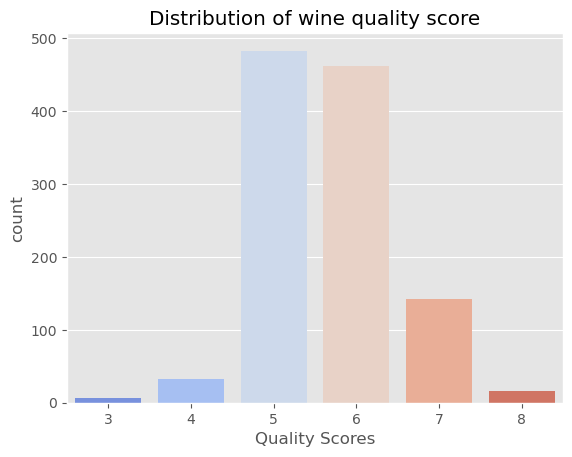

In [63]:
# countplot of the values on the qaulity 
sns.countplot(x="quality", data=wine_df, palette="coolwarm")
plt.title("Distribution of wine quality score")
plt.xlabel("Quality Scores")
plt.ylabel("count")
plt.show()

## Linear Regression 
- models a linear relationship

In [64]:
x_all_features = wine_df.drop("quality", axis=1)
y_target = wine_df["quality"]

In [65]:
# split the data 70:30 
x_train_all,x_test_all, y_train, y_test = train_test_split(x_all_features, y_target, test_size=0.3, random_state=42)

In [66]:
# selected alcohol hypothesis have a linear relationship with quality

x_train_simple = x_train_all[["alcohol"]]
x_test_simple = x_test_all[["alcohol"]]

# fit linear relation model 
model_simple_linear = LinearRegression()
model_simple_linear.fit(x_train_simple, y_train)

LinearRegression()

In [67]:
# coefficients 

slope_simple = model_simple_linear.coef_[0]
intercept_simple = model_simple_linear.intercept_

print(f"\simple linear model:quality = {intercept_simple:.2f}+{slope_simple:.2f}*alcohol")

\simple linear model:quality = 1.84+0.37*alcohol


In [68]:
# y = b + mx 
# simple prediction 
p_quality = 1.69 + (0.37*6.56)
print(p_quality)
y_pred_simple_test = model_simple_linear.predict(x_test_simple)

4.1172


In [69]:
# evaluate on test set 

r2_simple_test = r2_score(y_test,y_pred_simple_test)
mse_simple_test = mean_squared_error(y_test,y_pred_simple_test)
print(f"Test R-Squared: {r2_simple_test}")
print(f"MSE:{mse_simple_test}")

Test R-Squared: 0.2649750315401941
MSE:0.42736145604743403


## polynomial Regression 

In [70]:
feature_for_poly = "alcohol"

# select the target
x_train_poly_feature = x_train_all[[feature_for_poly]]
x_test_poly_feature = x_test_all[[feature_for_poly]]

In [71]:
degree = 2 # defines a linear relationship 
poly_transformer = PolynomialFeatures(degree = degree)
x_train_poly = poly_transformer.fit_transform(x_train_poly_feature)
x_test_poly = poly_transformer.fit_transform(x_test_poly_feature)

In [72]:
poly_feature_names = poly_transformer.get_feature_names_out([feature_for_poly])
print(f"Polynomial features (degree: {degree}:{poly_feature_names}")

Polynomial features (degree: 2:['1' 'alcohol' 'alcohol^2']


In [73]:
# fit the linear model to try do some predictions with it

model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)

LinearRegression()

In [74]:
y_pred_poly_test = model_poly.predict(x_test_poly)

In [75]:
# Evaluate on the test set 
r2_poly_test = r2_score(y_test, y_pred_poly_test)
mse_poly_test = mean_squared_error(y_test,y_pred_poly_test)
print(f"r2: {r2_poly_test}")
print(f"MSE: {mse_poly_test}")

r2: 0.27562077549103525
MSE: 0.42117176068909407


In [76]:
# underfiting == High bias, Low Variance 
# (errors in model prediction due to incorrect assumptions) 
# variance is when the model is very sensitive to small fluctuations in the training data 

# perfect value == Low bias, High Variance

# Overfitting == High variance, Low bias

## Model Diagnose

In [80]:
y_pred_poly_train = model_poly.predict(x_train_poly)
residuals_poly_train = y_train - y_pred_poly_train

Text(0.5, 1.0, 'Residuals vs. Fitted Values(Poly Model - Training Data)')

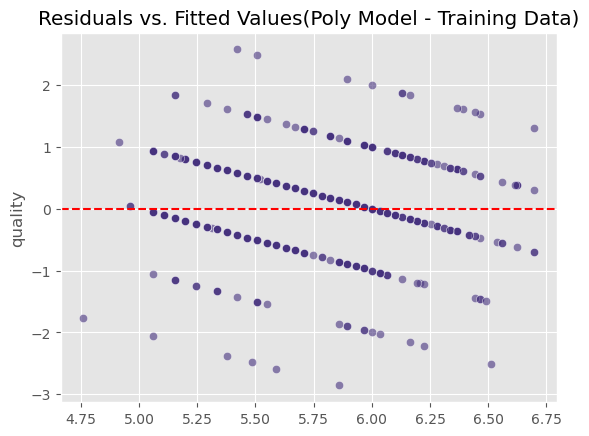

In [81]:
sns.scatterplot(x=y_pred_poly_train, y=residuals_poly_train, alpha=0.6)

plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs. Fitted Values(Poly Model - Training Data)")

In [84]:
# Interaction terms - Effect on one variable depends on another. 
feature_1 = "volatile acidity"
feature_2 = "sulphates"


In [85]:
x_train_inter = x_train_all[[feature_1, feature_2]].copy()
x_test_inter = x_test_all[[feature_1, feature_2]].copy()

In [86]:
model_interaction = LinearRegression()
model_interaction.fit(x_train_inter, y_train)

LinearRegression()

In [91]:
# coefficients
print("Model coefficients:")
print(f"intercept:{model_interaction.intercept_:.3f}")
print(f"coeff: {feature_1}: {model_interaction.coef_[0]: .3f}")
print(f"coeff: {feature_2}: {model_interaction.coef_[1]: .3f}")

Model coefficients:
intercept:6.073
coeff: volatile acidity: -1.784
coeff: sulphates:  0.793


In [95]:
# quality = 6.073 + -1.784*X_{1} + 0.793X_{2} + B3(X_{1} + X_{2} )

y_pred_interaction_test = model_interaction.predict(x_test_inter)


In [97]:
r2_interaction_test = r2_score(y_test, y_pred_interaction_test)
mse_interaction_test = mean_squared_error(y_test, y_pred_interaction_test)

In [98]:
r2_interaction_test

0.12441745475027921

In [99]:
mse_interaction_test

0.509085061711208